# **FINAL PROJECT 2 - Logistic Regression dan SVM**
----

### Anggota Kelompok:

1. Annisa Nur Hidayah                (PYTN-KS15-002)
2. Lisa Wahyu Ningsih                (PYTN-KS15-007)
3. Nadilla Nur 'Aini Yulian Putri    (PYTN-KS15-012)
----

## A. Introduction

### Rain Tomorrow Prediction 🌧

Prakiraan hujan sangat penting karena hujan lebat dan tidak teratur dapat menimbulkan banyak dampak negatif, seperti kerusakan tanaman dan pertanian ataupun kerugian harta benda. Model peramalan yang lebih baik sangat penting untuk peringatan dini yang dapat meminimalkan risiko terhadap dampak hujan lebat, serta mengelola infrastuktur yang dapat menampung dan/atau menyalurkan air hujan tersebut hingga ke badan air. Namun, prediksi hujan adalah tugas yang menantang dan hasil yang didapat harus akurat. Dengan memiliki data historis, machine learning dapat digunakan untuk memprediksi hujan secara akurat untuk musim mendatang. Teknik yang berbeda menghasilkan akurasi yang berbeda, sehingga penting untuk memilih algoritma yang tepat seperti regresi logistik dan SVM.

#### A.1. Konteks Data
klasifikasi apakah besok terjadi hujan atau tidak adalah untuk memprediksi kondisi cuaca di masa depan berdasarkan data historis dan faktor-faktor yang relevan. Beberapa tujuan dari klasifikasi cuaca ini antara lain:
- **Perencanaan Aktivitas**: Informasi cuaca yang akurat memungkinkan individu dan organisasi untuk merencanakan aktivitas dengan lebih baik. Misalnya, jika diperkirakan akan terjadi hujan, kegiatan luar ruangan dapat diubah atau ditunda.
- **Efisiensi Operasional**: Beberapa industri dan sektor, seperti pertanian, transportasi, pariwisata, dan energi, sangat tergantung pada kondisi cuaca. Dengan memiliki prediksi cuaca yang akurat, keputusan operasional yang lebih baik dapat diambil, mengoptimalkan efisiensi dan produktivitas.
- **Keamanan dan Keselamatan**: Prediksi cuaca yang baik dapat membantu dalam upaya keamanan dan keselamatan. Misalnya, jika cuaca buruk diperkirakan, langkah-langkah dapat diambil untuk memperingatkan masyarakat atau menghindari situasi berpotensi berbahaya.


#### A.2. Problem Statement
Dari beberapa tujuan prediksi cuaca besok yang sudah dijelaskan, dengan mengetahui apakah besok terjadi hujan atau tidak, sebuah organisasi dapat menentukan rencana untuk menanggulangi permasalahan tersebut.

#### A.3. Goals
Berdasarkan permasalahan tersebut, organiasi perlu memiliki tool untuk dapat memprediksi apakah besok akan terjadi hujan atau tidak sehingga dapat membuat sebuah rencana untuk beberapa sektor. sehingga pemerintah australia setelah mengetahui keadaan cuaca besok dapat menyiapkan rencana dari hari ini.

#### A.4. Metrics Evaluation
- Type 1 error : False Positive
Konsekuensi: Besok diprediksi hujan tetapi sebenarnya tidak hujan

- Type 2 error : False Negative
Konsekuensi: Besok diprediksi tidak hujan tetapi sebenarnya hujan

Berdasarkan konsekuensinya kedua kesalahan memiliki resiko yang sama sehingga metrics yang digunakan yaitu `roc_auc` karen kedua kelas dianggap sama penting

### A.5. Dataset

Dataset yang digunakan untuk pemodelan ini didapatkan dari kaggle (open source). Dataset ini bernama __Rain in Australia__. Kumpulan data ini berisi sekitar 10 tahun pengamatan cuaca harian dari beberapa titik sampel lokasi stasiun hujan di Australia. RainTomorrow adalah variabel target untuk diprediksi. Jika “Yes” maka besok harinya di sana hujan 1mm atau lebih. Dataset ini memiliki 23 atribut, antara lain:

- Date: tanggal hari itu
- Location: lokasi, nama kota di Australia
- MinTemp: temperatur terendah hari itu dalam celcius
- MaxTemp: temperatur tertinggi hari itu dalam celcius
- Rainfall: jumlah curah hujan hari itu dalam mm
- Evaporation: jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine: jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir: arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed: kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am: arah angin jam 9 pagi
- WindDir3pm: arah angin jam 3 sore
- WindSpeed9am: kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm: kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am: humiditas jam 9 pagi dalam persen
- Humidity3pm: humiditas jam 3 sore dalam persen
- Pressure9am: tekanan udara jam 9 pagi dalam hpa
- Pressure3pm: tekanan udara jam 3 sore dalam hpa
- Cloud9am: persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm: persentase langit yang tertutup awan jam 3 sore
- Temp9am: temperatur jam 9 pagi dalam celcius
- Temp3pm: temperatur jam 3 sore dalam celcius
- RainToday: apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak maka 0.
- RainTomorrow

----
## B. Import Library

In [1]:
# !pip install category_encoders

In [2]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick
import plotly.express as px
import missingno as msno

# Train test split
from sklearn.model_selection import train_test_split

# Menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# Encoder dan scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer

# Algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Hyperparametres untuk logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Resampling
from imblearn.over_sampling import SMOTE

# Cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Plot kurva ROC 
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, auc

# Metrics untuk classification
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

----
## C. Load Data

Data Loading adalah proses untuk menyalin dan memuat kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

In [3]:
# Memasukkan data
df = pd.read_csv('dataset/weatherAUS.csv')

In [4]:
# Memeriksa dimensi data
df.shape


(145460, 23)

In [5]:
# Menampilkan data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Menampilkan data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# Mengecek kolom kategori

categorical_kol = [col for col in df.columns if df[col].dtypes =='O']

print('terdapat {} kolom kategori'.format(len(categorical_kol)))
print('kolom kategori sebanyak:', categorical_kol)

terdapat 7 kolom kategori
kolom kategori sebanyak: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# Mengecek kolom numerik

numerical_kol = [col for col in df.columns if df[col].dtypes !='O']

print('terdapat {} kolom numerik'.format(len(numerical_kol)))
print('kolom numerik sebanyak:', numerical_kol)

terdapat 16 kolom numerik
kolom numerik sebanyak: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [10]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()[:5]])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Date,3436,"[2008-12-01, 2008-12-02, 2008-12-03, 2008-12-0..."
1,Location,49,"[Albury, BadgerysCreek, Cobar, CoffsHarbour, M..."
2,MinTemp,389,"[13.4, 7.4, 12.9, 9.2, 17.5]"
3,MaxTemp,505,"[22.9, 25.1, 25.7, 28.0, 32.3]"
4,Rainfall,681,"[0.6, 0.0, 1.0, 0.2, 1.4]"
5,Evaporation,358,"[nan, 12.0, 14.8, 12.6, 10.8]"
6,Sunshine,145,"[nan, 12.3, 13.0, 13.3, 10.6]"
7,WindGustDir,16,"[W, WNW, WSW, NE, NNW]"
8,WindGustSpeed,67,"[44.0, 46.0, 24.0, 41.0, 56.0]"
9,WindDir9am,16,"[W, NNW, SE, ENE, SW]"


----
## D. Data Cleaning

Data cleaning merupakan proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.

In [11]:
# Melihat data yang kosong
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

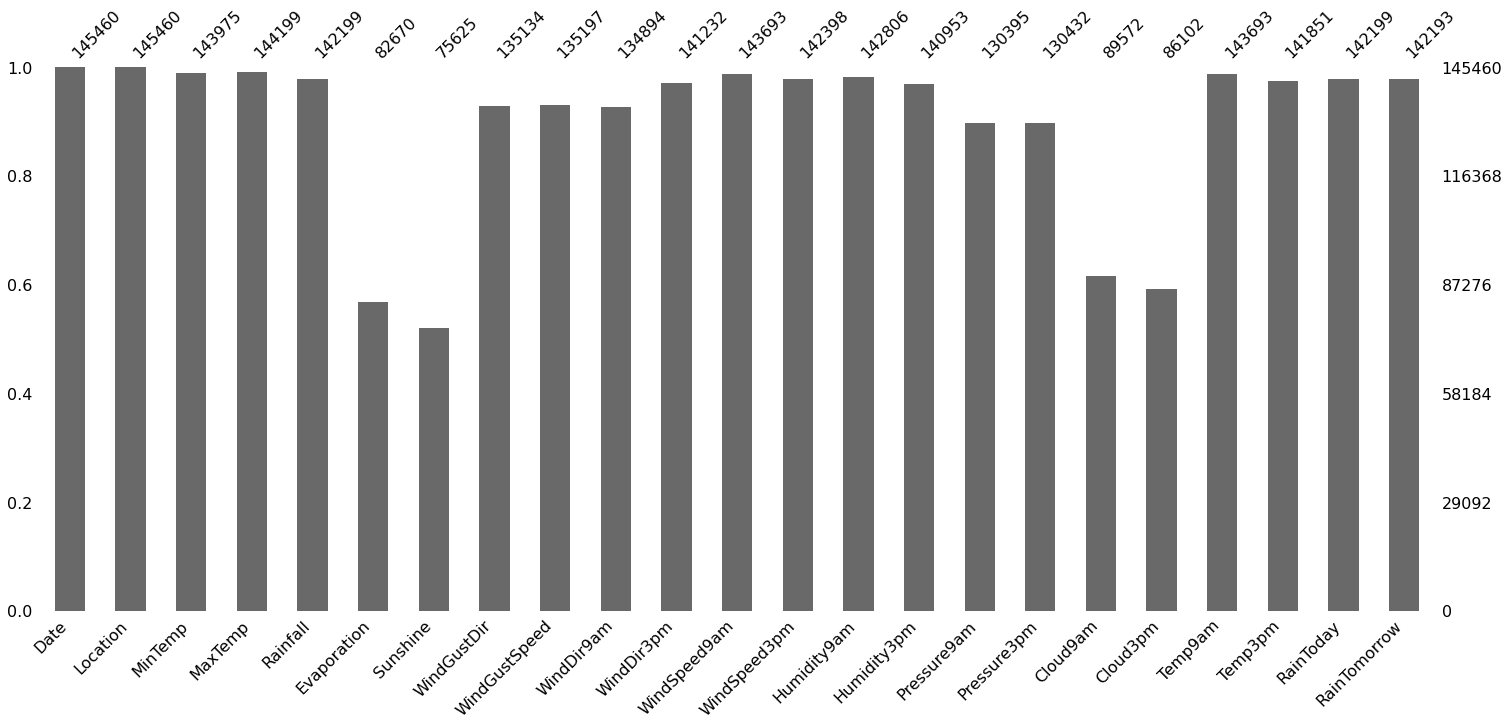

In [12]:
msno.bar(df)

<AxesSubplot:>

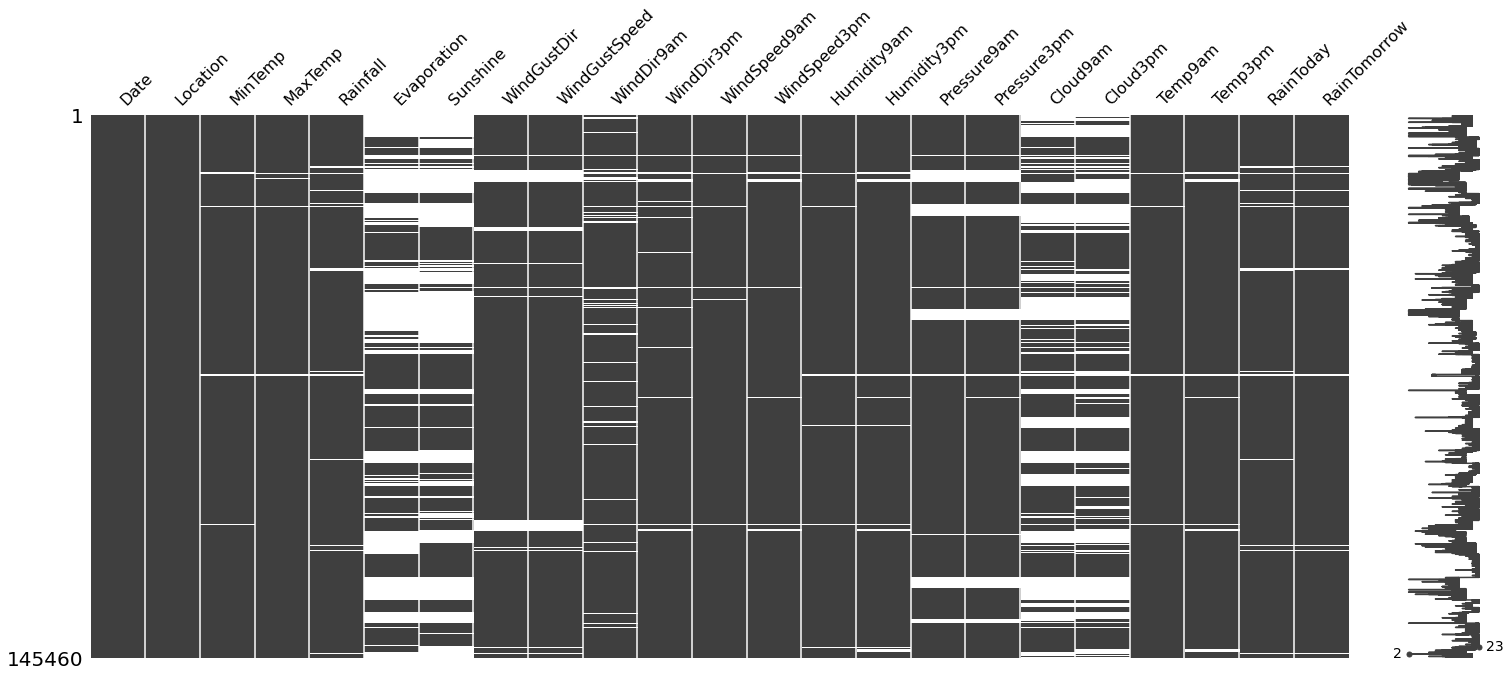

In [13]:
msno.matrix(df)

In [14]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value Count'})
df_null['% Total Missing Value'] = df_null['Missing Value Count'] / len(df) * 100
df_null['% Total Missing Value'] = df_null['% Total Missing Value'].round(2)
df_null.sort_values('% Total Missing Value', ascending=False)

,column,Missing Value Count,% Total Missing Value
6,Sunshine,69835,48.01
5,Evaporation,62790,43.17
18,Cloud3pm,59358,40.81
17,Cloud9am,55888,38.42
15,Pressure9am,15065,10.36
16,Pressure3pm,15028,10.33
9,WindDir9am,10566,7.26
7,WindGustDir,10326,7.10
8,WindGustSpeed,10263,7.06
14,Humidity3pm,4507,3.10


Dari tabel di atas, diketahui bahwa untuk data null masih dalam batas wajar, yaitu masih dalam rentang 0 - 50%. Untuk data null di atas 70%, maka perlu untuk dilakukan drop data. Namun, dalam hal ini tidak diperlukan dan data masih dapat untuk digunakan.


### D.1. Tipe Data

In [15]:
display(df.describe(), df.describe(include='all'))

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


### D.2. Categorial Data

In [16]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [17]:
df[cat_features].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [18]:
listItem = []
for col in cat_features :
    listItem.append( [col, df[col].nunique(), df[col].unique()[:5]])

catDF = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
catDF

,Column Name,Number of Unique,Unique Sample
0,Date,3436,"[2008-12-01, 2008-12-02, 2008-12-03, 2008-12-0..."
1,Location,49,"[Albury, BadgerysCreek, Cobar, CoffsHarbour, M..."
2,WindGustDir,16,"[W, WNW, WSW, NE, NNW]"
3,WindDir9am,16,"[W, NNW, SE, ENE, SW]"
4,WindDir3pm,16,"[WNW, WSW, E, NW, W]"
5,RainToday,2,"[No, Yes, nan]"
6,RainTomorrow,2,"[No, Yes, nan]"


In [19]:
df_cat = df[cat_features]
df_cat.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [20]:
# Memisahkan pada kolom Date
df['Date'] = pd.to_datetime(df['Date'])

# Mengonversi data tahun dari Date
df['Year'] = df['Date'].dt.year

# Mengonversi data bulan dari Date
df['Month'] = df['Date'].dt.month

In [21]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN,2017,6


In [22]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
listItem = []
for col in cat_features :
    listItem.append( [col, df[col].nunique(), df[col].unique()[:5]])

catDF = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
catDF

,Column Name,Number of Unique,Unique Sample
0,Location,49,"[Albury, BadgerysCreek, Cobar, CoffsHarbour, M..."
1,WindGustDir,16,"[W, WNW, WSW, NE, NNW]"
2,WindDir9am,16,"[W, NNW, SE, ENE, SW]"
3,WindDir3pm,16,"[WNW, WSW, E, NW, W]"
4,RainToday,2,"[No, Yes, nan]"
5,RainTomorrow,2,"[No, Yes, nan]"


### D.3. Check Duplicate Data

In [23]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month


Dataset ini tidak memiliki data duplikat.

### D.4. Outlier pada Data

In [24]:
num_features = df.select_dtypes(include='number').columns.tolist()
num_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month']

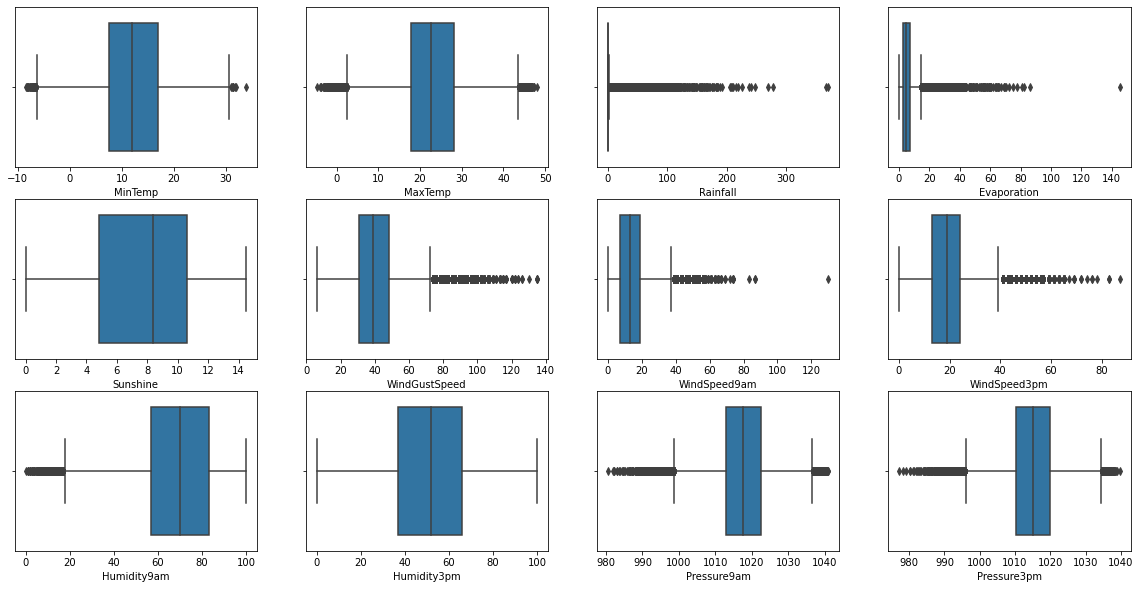

In [25]:
import seaborn as sns

count = 0
fig, ax = plt.subplots(3, 4, figsize = (20,10))
for i in range(0,3):
    for j in range(0,4):
        sns.boxplot(data = df, x = num_features[count], ax = ax[i][j])
        count += 1

# fig.suptitle('Distribution from numericals data by Boxplot')
plt.show()

 Pada dataset ini terdapat cukup banyak outlier pada data, tetapi ketika dilihat dari nilainya nilai-nilai tersebut masih termasuk masuk akal. Contohnya adalah max temparature pada negara australia sendiri memang pernah mencapai angka 50° jika dilihat pada sumber [berikut](https://en.wikipedia.org/wiki/List_of_extreme_temperatures_in_Australia#:~:text=The%20highest%20temperature%20ever%20recorded,2022%20at%20Onslow%2C%20Western%20Australia.)
 
 Namun, kita coba visualisasi histogram pada beberapa yang masih terdapat outlier pada kolom Rainfall, Evaporation, WindSpeed9am, dan WindSpeed3pm.

Text(0, 0.5, 'RainTomorrow')

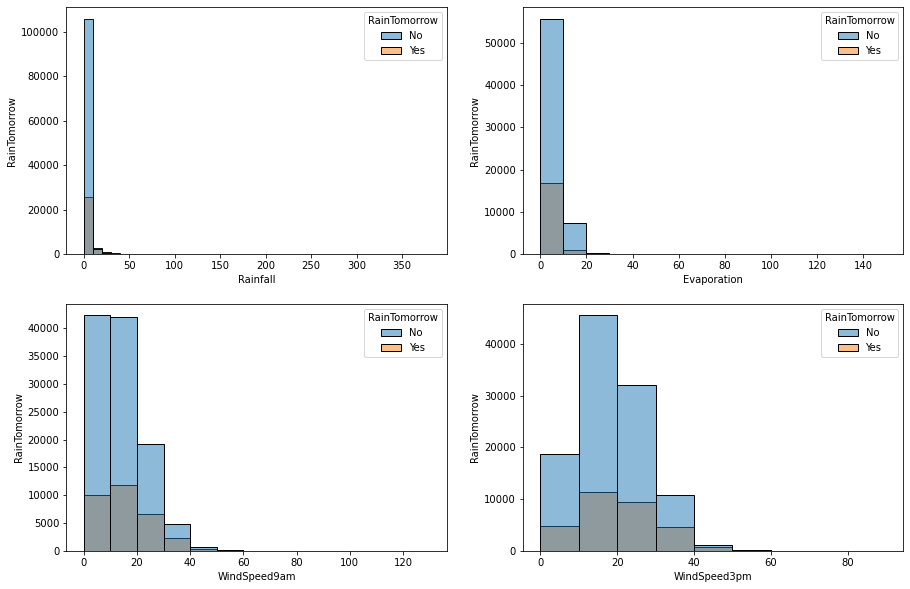

In [26]:
# Mengecek distribusi kolom yang terdapat outlier
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
outlier1 = df[['Rainfall','RainTomorrow']]

fig = sns.histplot(data=outlier1, x="Rainfall", binwidth=10,hue="RainTomorrow")

fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
outlier2 = df[['Evaporation','RainTomorrow']]
fig = sns.histplot(data=outlier2, x="Evaporation", binwidth=10,hue="RainTomorrow")

fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
outlier3 = df[['WindSpeed9am','RainTomorrow']]

fig = sns.histplot(data=outlier3, x="WindSpeed9am", binwidth=10,hue="RainTomorrow")
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
outlier4 = df[['WindSpeed3pm','RainTomorrow']]

fig = sns.histplot(data=outlier4, x="WindSpeed3pm", binwidth=10,hue="RainTomorrow")
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [27]:
# menemukan outlier kolom Rainfall
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# menemukan outlier kolom Evaporation
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# menemukan outlier kolom WindSpeed9am
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# menemukan outlier kolom WindSpeed3pm
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers values falls < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers values falls < -2.4000000000000004 or > 3.2
Evaporation outliers values falls < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers values falls < -29.0 or > 55.0
WindSpeed3pm outliers values falls < -20.0 or > 57.0


In [28]:
def max_value(df3, feature, top):
    return np.where(df3[feature]>top, top, df3[feature])

for df3 in [df]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

Text(0, 0.5, 'RainTomorrow')

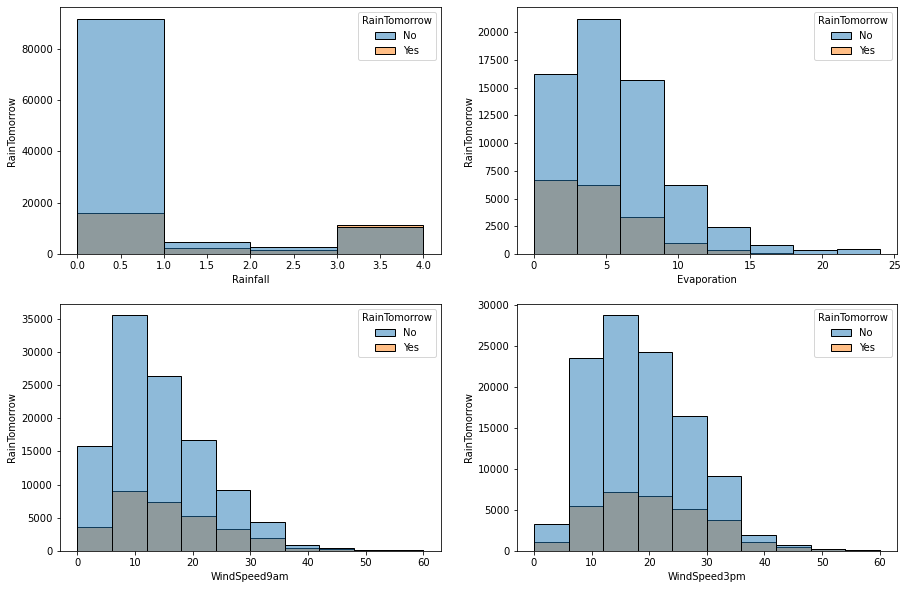

In [29]:
# mengecek kolom yang terdapat outlier dengan visualisasi histogram
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
outlier1_2 = df[['Rainfall','RainTomorrow']]

fig = sns.histplot(data=outlier1_2, x="Rainfall", binwidth=1,hue="RainTomorrow")

fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
outlier2_2 = df[['Evaporation','RainTomorrow']]
fig = sns.histplot(data=outlier2_2, x="Evaporation", binwidth=3,hue="RainTomorrow")

fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
outlier3_3 = df[['WindSpeed9am','RainTomorrow']]

fig = sns.histplot(data=outlier3_3, x="WindSpeed9am", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
outlier4_4 = df[['WindSpeed3pm','RainTomorrow']]

fig = sns.histplot(data=outlier4_4, x="WindSpeed3pm", binwidth=6,hue="RainTomorrow")
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

### D.5. Mengisi Kolom Numerik yang Kosong

Pengambilan keputusan:

  Berdasarkan observasi dari visualisasi di atas terdapat data skewed. Oleh karena itu, digunakan pengambilan keputusan dengan mengganti nilai yang missing value dengan media karena tahan terhadap outlier.

In [30]:
# Mengecek kolom yang kosong
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
Year             False
Month            False
dtype: bool

In [31]:
# Mengganti kolom dengan nilai yang kosong dengan median pada data numerik
for df1 in [df]:
    for col in num_features:
        col_median=df[col].median()
        df1[col].fillna(col_median, inplace=True)       

In [32]:
# Mengecek kembali kolom yang nilainya kosong pada data numerik
df[num_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
dtype: int64

### D.6. Mengisi Kolom Kategori yang Kosong

In [33]:
# Mengisi nilai pada missing value pada kolom kategori
for df_cat in [df]:
    df_cat['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
    df_cat['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
    df_cat['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
    df_cat['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
    df_cat['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

In [34]:
# Mengecek kembali kolom yang nilainya kosong
df[categorical_kol].isnull().any()

Date            False
Location        False
WindGustDir     False
WindDir9am      False
WindDir3pm      False
RainToday       False
RainTomorrow    False
dtype: bool

In [35]:
# Mengecek kolom kategori
categorical_col = [var for var in df.columns if df[var].dtype=='O']

print('We have {} Categorical Variables.\n'.format(len(categorical_col)))

print('Categorical Variables:', categorical_col)

df[categorical_col].nunique()

We have 6 Categorical Variables.

Categorical Variables: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [36]:
# Mengecek kolom kategori dengan nilai yang kosong
df[categorical_col].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### D.7. Data Imbalance

In [37]:
df['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

In [38]:
target_count = df['RainTomorrow'].value_counts().reset_index().rename(columns={
    'index':'RainTomorrow',
    'RainTomorrow': 'count'
})
target_count

,RainTomorrow,count
0,No,113583
1,Yes,31877


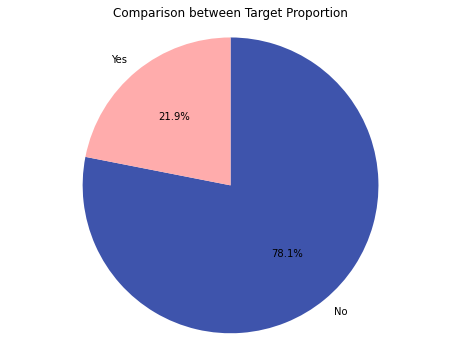

In [39]:
plt.figure(figsize=(8,6))
plt.pie(target_count['count'],
        labels=target_count['RainTomorrow'],
        autopct='%.1f%%',
        colors=['#3E54AC','#FFACAC'],
        startangle=90,
        counterclock=False
)
plt.axis('equal')
plt.title('Comparison between Target Proportion')

plt.show()

Pada dataset ini, kolom target merupakan data imbalance di mana kolom target memiliki 78,1% untuk besok tidak terjadi hujan, dan 21,9% besok terjadi hujan. Dengan begitu, kita bisa mencoba metode resampling untuk menyelesaikan permasalahan tersebut.

----
## E. Explore Data

__EDA__ atau __Exploratory Data Analysis__ ialah sebuah proses kritis dalam melakukan investigasi awal pada data dengan tujuan menemukan pola, anomali, menguji hipotesis, dan dapat memeriksa asumsi dengan bantuan statistik ringkasan. Kemudian, dapat dibuat representasi grafis (visualisasi) dari data tersebut.

In [40]:
# Menduplikasi dataset
df_new = df.copy()

In [41]:
# Mengecek kolom kategori
categorical_kol

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [42]:
# Mengecek kolom numerik
numerical_kol

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

### E.1. Visualisasi Data Minimal dan Maximal Temperature Berdasarkan Lokasi

In [43]:
# Membuat grup untuk lokasi, min dan max temperatur
loc_temp = df_new.groupby("Location")[["MinTemp", "MaxTemp"]].mean().round()
loc_temp = loc_temp.reset_index()
loc_temp.columns= ["Location","MinTemp", "MaxTemp"]

# Membuat judul
fig = px.bar(loc_temp, x="Location", y=["MinTemp", "MaxTemp"], title="Australian City Temperature Average From Minimum to Maximum")

# Menampilkan
fig.show()

Pada diagram di atas menunjukkan bahwa :
- Lokasi dengan temperature cenderung tinggi berada di wilayah Katherine dan Darwin dengan rata-rata maxtemp sekitar 56 dan mintemp sekitar 23. 
- Sedangkan, lokasi dengan temperature yang cenderung rendah berada di wilayah MountGinini dengan rata-rata maxtemp sekitar 16 dan mintemp sekitar 4.

### E.2. Visualisasi Data Humidity Berdasarkan Lokasi

In [44]:
# Membuat grup untuk lokasi, humidity 9 am dan humidity 3 pm
loc_humidity = df_new.groupby("Location")[["Humidity9am", "Humidity3pm"]].mean().round()
loc_humidity = loc_humidity.reset_index()
loc_humidity.columns= ["Location","Humidity9am", "Humidity3pm"]

# Membuat judul
fig = px.bar(loc_humidity, x="Location", y=["Humidity9am", "Humidity3pm"], title="Australian City Humidity From 9 AM to 3 PM  ")

# Menampilkan
fig.show()

Pada diagram di atas menunjukkan bahwa :
- Lokasi dengan rata-rata tingkat kelembapan cenderung tinggi berada di wilayah Dartmoor dan Mount Ginini.
- Sedangkan, lokasi dengan rata-rata tingkat kelembapan yang cenderung rendah berada di wilayah AliceSprings dan Uluru.

### E.3. Visualisasi Data Kecepatan Angin Berdasarkan Lokasi

In [45]:
# Membuat grup untuk lokasi, Wind Speed 9 am dan Wind Speed 3 pm
loc_cloud = df_new.groupby("Location")[["WindSpeed9am", "WindSpeed3pm"]].mean().round()
loc_cloud = loc_cloud.reset_index()
loc_cloud.columns= ["Location","WindSpeed9am", "WindSpeed3pm"]

# Membuat judul
fig = px.bar(loc_cloud, x="Location", y=["WindSpeed9am", "WindSpeed3pm"], title="Australian City Wind Speed From 9 AM to 3 PM  ")

# Menampilkan
fig.show()

Pada diagram di atas menunjukkan bahwa :
- Lokasi dengan rata-rata tingkat kecepatan angin cenderung tinggi berada di wilayah Gold Coast dan Sydney Airport.
- Sedangkan, lokasi dengan rata-rata tingkat kecepatan angin yang cenderung rendah berada di wilayah Newcastle.

### E.4. Visualisasi Data Tekanan Berdasarkan Lokasi

In [46]:
# Membuat grup untuk lokasi, pressure 9 am dan pressure 3 pm
loc_press = df_new.groupby("Location")[["Pressure9am", "Pressure3pm"]].mean().round()
loc_press = loc_press.reset_index()
loc_press.columns= ["Location","Pressure9am", "Pressure3pm"]

# Membuat judul
fig = px.bar(loc_press, x="Location", y=["Pressure9am", "Pressure3pm"], title="Australian City Pressure From 9 AM to 3 PM  ")

# Menampilkan
fig.show()

Pada diagram di atas menunjukkan bahwa rata-rata nilai tekanan udara di Australia cenderung stabil pada keseluruhan wilayahnya.

### E.5. Visualisasi Data Curah Hujan Tiap Bulan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 720x576 with 0 Axes>

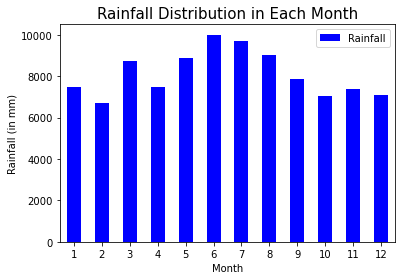

In [47]:
# Membuat grup untuk tahun, bulan dan curah hujan
rainfall =[df_new['Year'], df_new['Month'], df_new['Rainfall']]
headers = ['Year','Month', 'Rainfall']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(10,8))
a = rainfall_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='blue')

# Membuat judul
plt.title('Rainfall Distribution in Each Month', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

Pada grafik di atas menunjukkan bahwa curah hujan tertinggi ada pada bulan ke-6 dan curah hujan terendah pada bulan ke-2.

### E.6. Visualisasi Presentase Hari Ini dan Besok Hujan atau Tidak

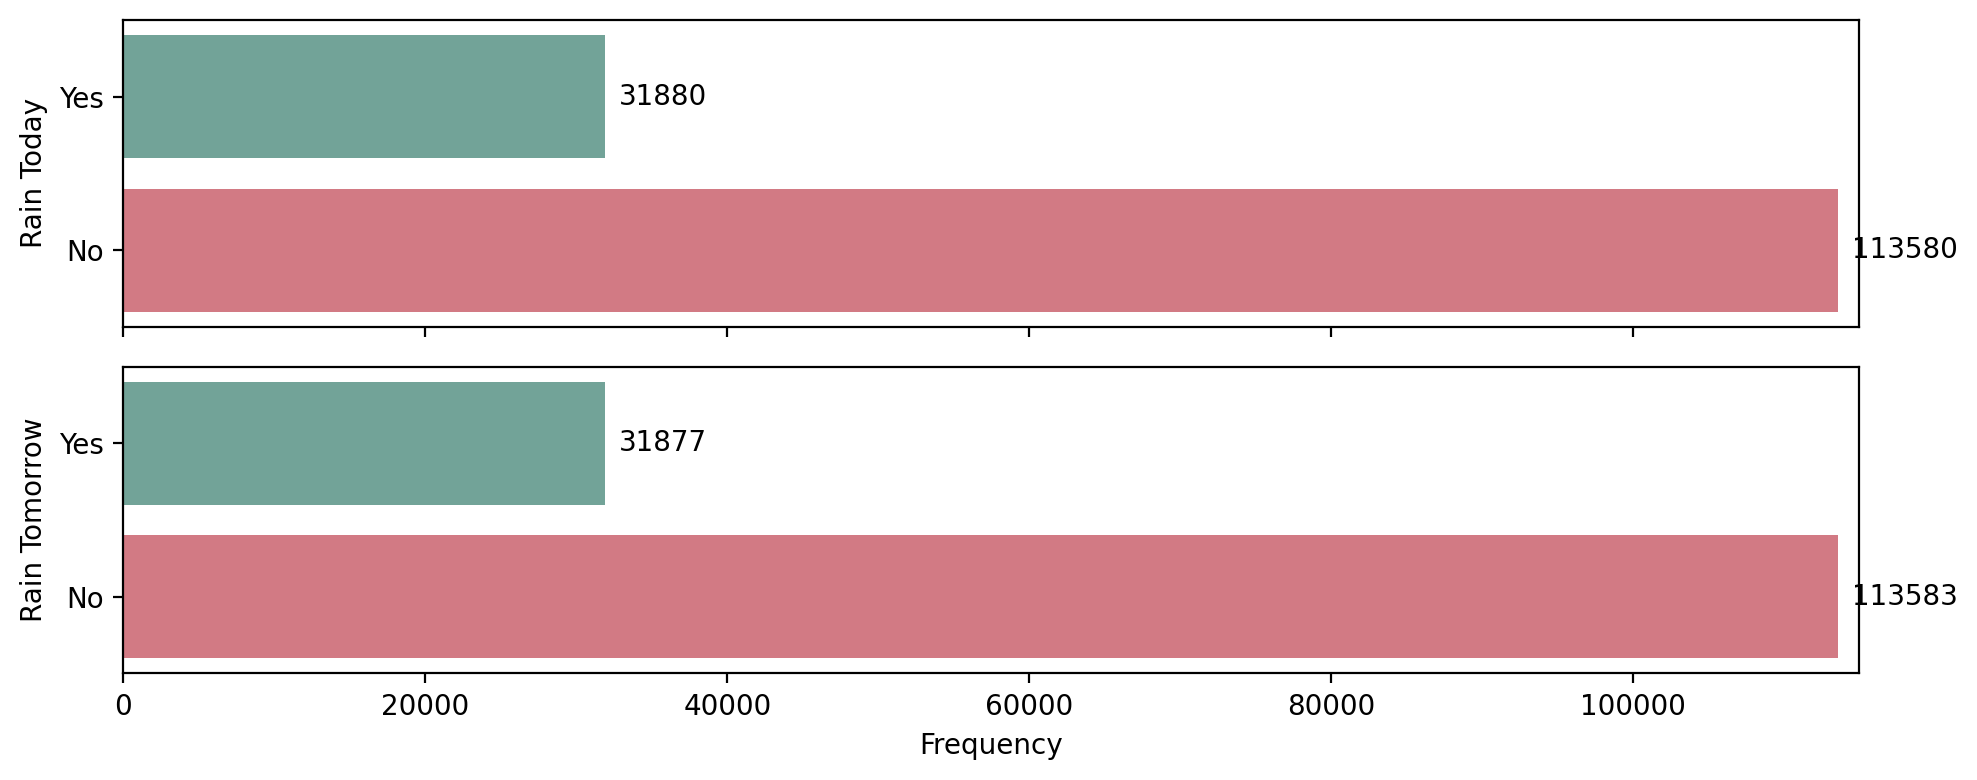

In [48]:
nrows,ncols = 2,1
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i,j,k in zip(range(nrows),["RainToday","RainTomorrow"],["Rain Today","Rain Tomorrow"]):
    countplot = sns.countplot(data=df,y=j,palette=["#6AAB9C","#E06C78"],order=["Yes","No"],ax=ax[i])
    for l in countplot.containers:
        countplot.bar_label(l,padding=5)
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,115000)
    ax[i].set_ylabel(k)

ax[1].set_xlabel("Frequency")
plt.tight_layout()
plt.show()

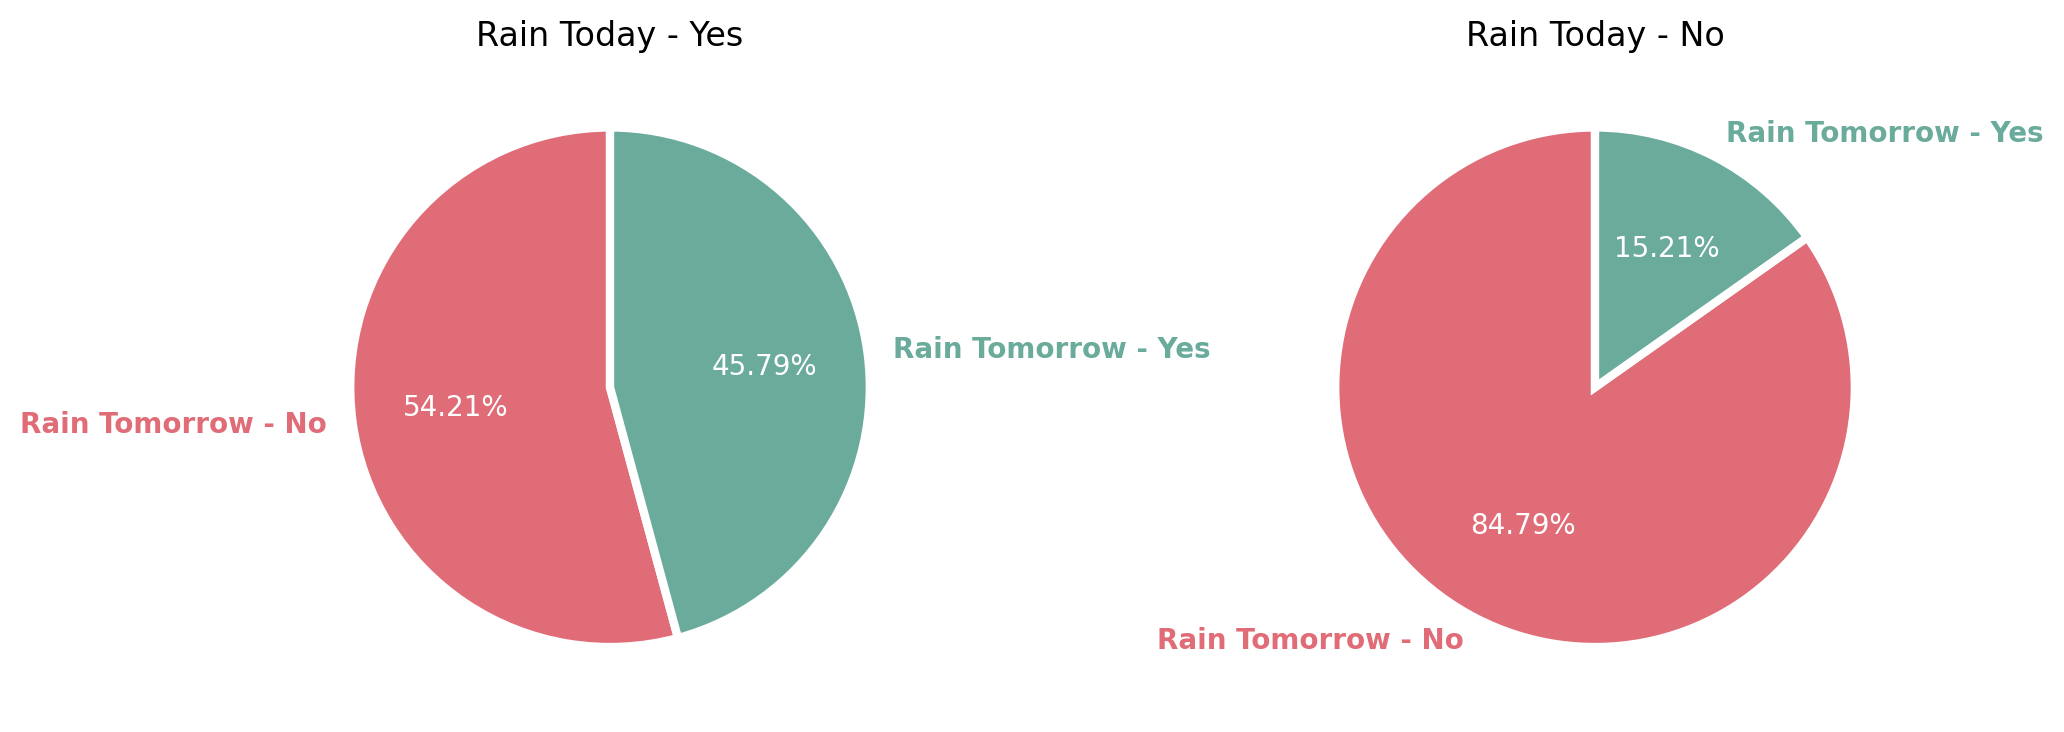

In [49]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["RainToday","RainTomorrow"]).count()[["Location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        colors=["#E06C78","#6AAB9C"],
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")
    
plt.tight_layout()
plt.show()

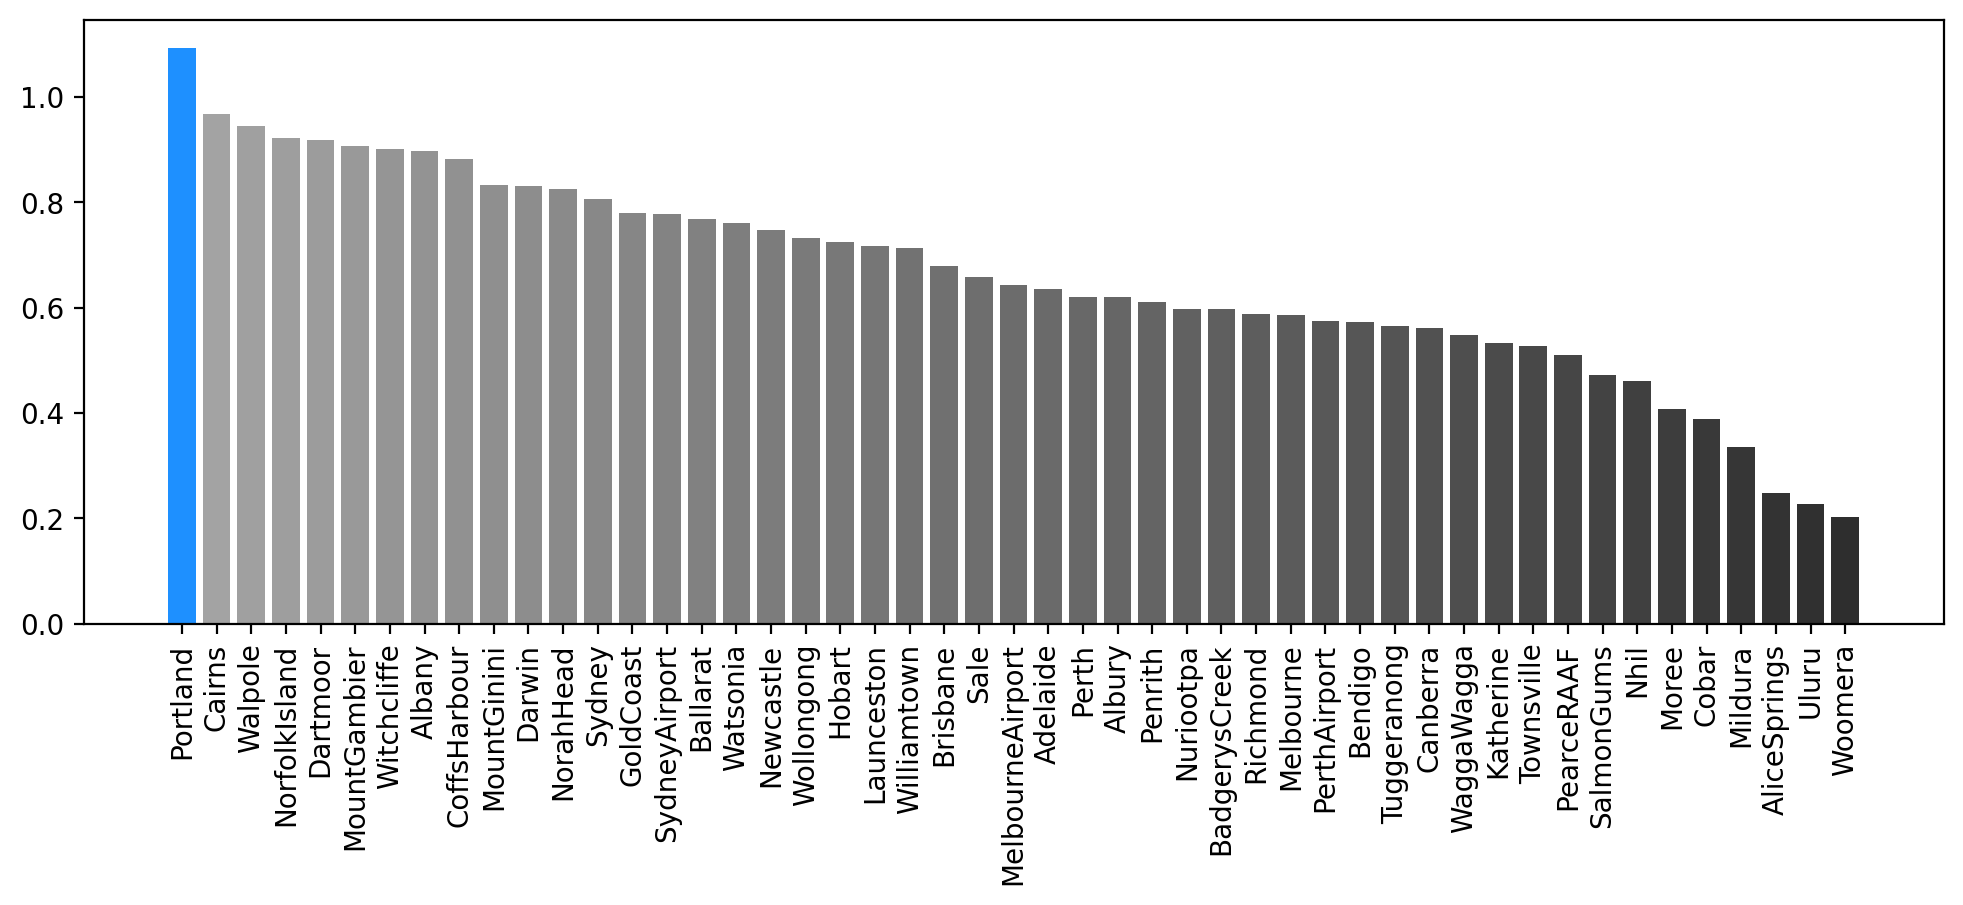

In [50]:
plt.figure(figsize=(12,4),dpi=200)

plt.bar(
    df.groupby("Location").mean()[["Rainfall"]].sort_values("Rainfall",ascending=False).index,
    np.ravel(df.groupby("Location").mean()[["Rainfall"]].sort_values("Rainfall",ascending=False).values),
    color=["dodgerblue"] + list(plt.get_cmap("Greys")(np.linspace(0.45,0.85,df["Location"].nunique())))[1:]
)

plt.xticks(rotation=90)
plt.show()

Dari hasil visualisasi curah hujan rata-rata setiap lokasi dan grafik lokasi di atas, maka dapat dilihat bahwa Portland (disorot dengan warna biru) memiliki curah hujan tertinggi 0,8+.

----
## F. Data Preprocessing

Data prerocessing adalah proses mengubah data mentah ke dalam bentuk yang lebih mudah dipahami. Proses ini diperlukan untuk memperbaiki kesalahan pada data mentah yang seringkali tidak lengkap dan memiliki format yang tidak teratur.

### F.1. Membuat Kelompok Kolom

In [51]:
# Mengelompokkan data numerik dan kategori
new_col = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow",
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "Sunshine",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "Month",
    "Year",
]

data_col = df_new[new_col]

data_col.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Month,Year
0,Albury,W,W,WNW,No,No,13.4,22.9,0.6,4.8,...,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,12,2008
1,Albury,WNW,NNW,WSW,No,No,7.4,25.1,0.0,4.8,...,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,12,2008
2,Albury,WSW,W,WSW,No,No,12.9,25.7,0.0,4.8,...,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,12,2008
3,Albury,NE,SE,E,No,No,9.2,28.0,0.0,4.8,...,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,12,2008
4,Albury,W,ENE,NW,No,No,17.5,32.3,1.0,4.8,...,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,12,2008


### F.2. Membuat Label Encoder pada Kolom Kategori

In [52]:
# Mempersiapkan code label encoder
encoder = preprocessing.LabelEncoder()

# Mentransformasikan kolom kategori untuk di label encoder
data_col["Location"] = encoder.fit_transform(data_col["Location"])
data_col["WindGustDir"] = encoder.fit_transform(data_col["WindGustDir"])
data_col["WindDir9am"] = encoder.fit_transform(data_col["WindDir9am"])
data_col["WindDir3pm"] = encoder.fit_transform(data_col["WindDir3pm"])
data_col["RainToday"] = encoder.fit_transform(data_col["RainToday"])
data_col["RainTomorrow"] = encoder.fit_transform(data_col["RainTomorrow"])

# Menampilkan kolom
print(data_col.head(5))
print('-'*100)
print(data_col.tail(5))

   Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow  \
0         2           13          13          14          0             0   
1         2           14           6          15          0             0   
2         2           15          13          15          0             0   
3         2            4           9           0          0             0   
4         2           13           1           7          0             0   

   MinTemp  MaxTemp  Rainfall  Evaporation  ...  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6          4.8  ...          20.0          24.0   
1      7.4     25.1       0.0          4.8  ...           4.0          22.0   
2     12.9     25.7       0.0          4.8  ...          19.0          26.0   
3      9.2     28.0       0.0          4.8  ...          11.0           9.0   
4     17.5     32.3       1.0          4.8  ...           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am

In [53]:
# Mengelompokkan kolom kategori
new_categor = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow"]

data_categor = data_col[new_categor]

### F.3. Mengecek Korelasi Kolom Kategori

In [54]:
# Mengecek korelasi
df_corr_categor = data_categor.corr()
df_corr_categor

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Location,1.000000,-0.003732,-0.002439,0.008769,-0.005484,-0.005498
WindGustDir,-0.003732,1.000000,0.353790,0.563161,0.124675,0.048774
WindDir9am,-0.002439,0.353790,1.000000,0.301249,0.167718,0.035341
WindDir3pm,0.008769,0.563161,0.301249,1.000000,0.121719,0.028890
RainToday,-0.005484,0.124675,0.167718,0.121719,1.000000,0.305744
RainTomorrow,-0.005498,0.048774,0.035341,0.028890,0.305744,1.000000


<AxesSubplot:>

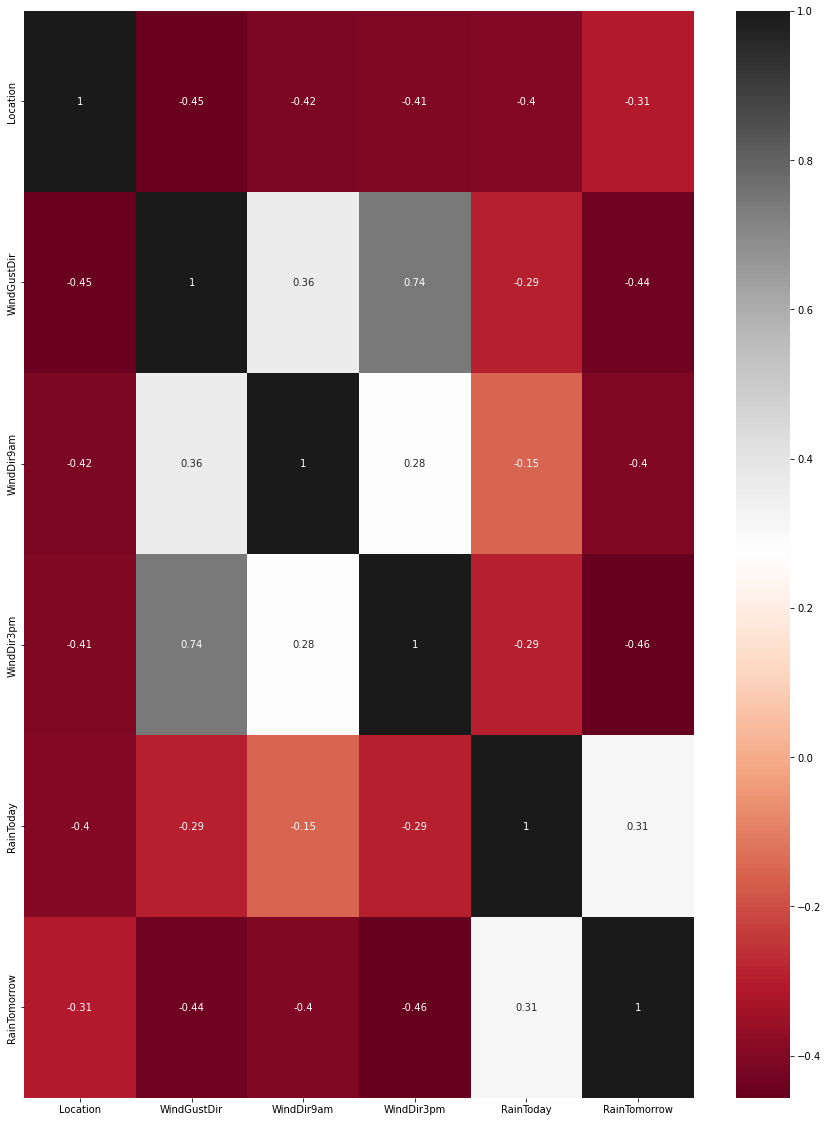

In [55]:
# Menampilkan korelasi dengan rain today dan rain tomorrow
plt.figure(figsize=(15,20))
sns.heatmap(df_corr_categor.corr(),cmap='RdGy' ,annot=True)

### F.4. Mengecek Korelasi Kolom Numerik

In [56]:
# Mengelompokkan kolom numerik
numeric_col = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "Sunshine",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "Month",
    "Year",
    "RainTomorrow",
    "RainToday"
]

data_numer = data_col[numeric_col]

data_numer.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Month,Year,RainTomorrow,RainToday
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,12,2008,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,12,2008,0,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,12,2008,0,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,12,2008,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,12,2008,0,0


In [57]:
# mengecek korelasi kolom numerik
df_corr_num = data_numer.corr()
df_corr_num

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Month,Year,RainTomorrow,RainToday
MinTemp,1.000000,0.733358,0.058795,0.401675,0.032632,0.171899,0.173816,0.173452,-0.231310,0.006111,-0.423299,-0.432824,0.897829,0.698574,-0.202675,0.042938,0.082249,0.054671
MaxTemp,0.733358,1.000000,-0.236617,0.490097,0.315487,0.066451,0.014436,0.049789,-0.498350,-0.498725,-0.308057,-0.396339,0.879335,0.968332,-0.162983,0.061486,-0.156523,-0.225192
Rainfall,0.058795,-0.236617,1.000000,-0.163210,-0.248481,0.153045,0.102506,0.079421,0.370411,0.391995,-0.190460,-0.108089,-0.100214,-0.241094,0.009503,-0.016414,0.327693,0.953068
Evaporation,0.401675,0.490097,-0.163210,1.000000,0.310985,0.163611,0.161466,0.112926,-0.419919,-0.318089,-0.236957,-0.258439,0.468633,0.475035,-0.023294,0.042161,-0.096481,-0.155940
Sunshine,0.032632,0.315487,-0.248481,0.310985,1.000000,-0.031229,-0.012085,0.023351,-0.330031,-0.430357,0.035759,-0.010618,0.191385,0.331676,0.017529,0.038682,-0.319412,-0.234048
WindGustSpeed,0.171899,0.066451,0.153045,0.163611,-0.031229,1.000000,0.579032,0.657926,-0.208803,-0.026804,-0.425819,-0.384140,0.145717,0.032375,0.058797,-0.028047,0.220144,0.145332
WindSpeed9am,0.173816,0.014436,0.102506,0.161466,-0.012085,0.579032,1.000000,0.512359,-0.268722,-0.031320,-0.215360,-0.165319,0.127702,0.004942,0.051114,-0.017831,0.086763,0.098930
WindSpeed3pm,0.173452,0.049789,0.079421,0.112926,0.023351,0.657926,0.512359,1.000000,-0.143565,0.016175,-0.277503,-0.239418,0.161479,0.027805,0.059753,-0.029025,0.084103,0.077158
Humidity9am,-0.231310,-0.498350,0.370411,-0.419919,-0.330031,-0.208803,-0.268722,-0.143565,1.000000,0.659290,0.131418,0.175914,-0.469774,-0.491242,-0.090100,0.009837,0.251415,0.346902
Humidity3pm,0.006111,-0.498725,0.391995,-0.318089,-0.430357,-0.026804,-0.031320,0.016175,0.659290,1.000000,-0.025986,0.048527,-0.216951,-0.555606,-0.018597,-0.009038,0.433167,0.367919


<AxesSubplot:>

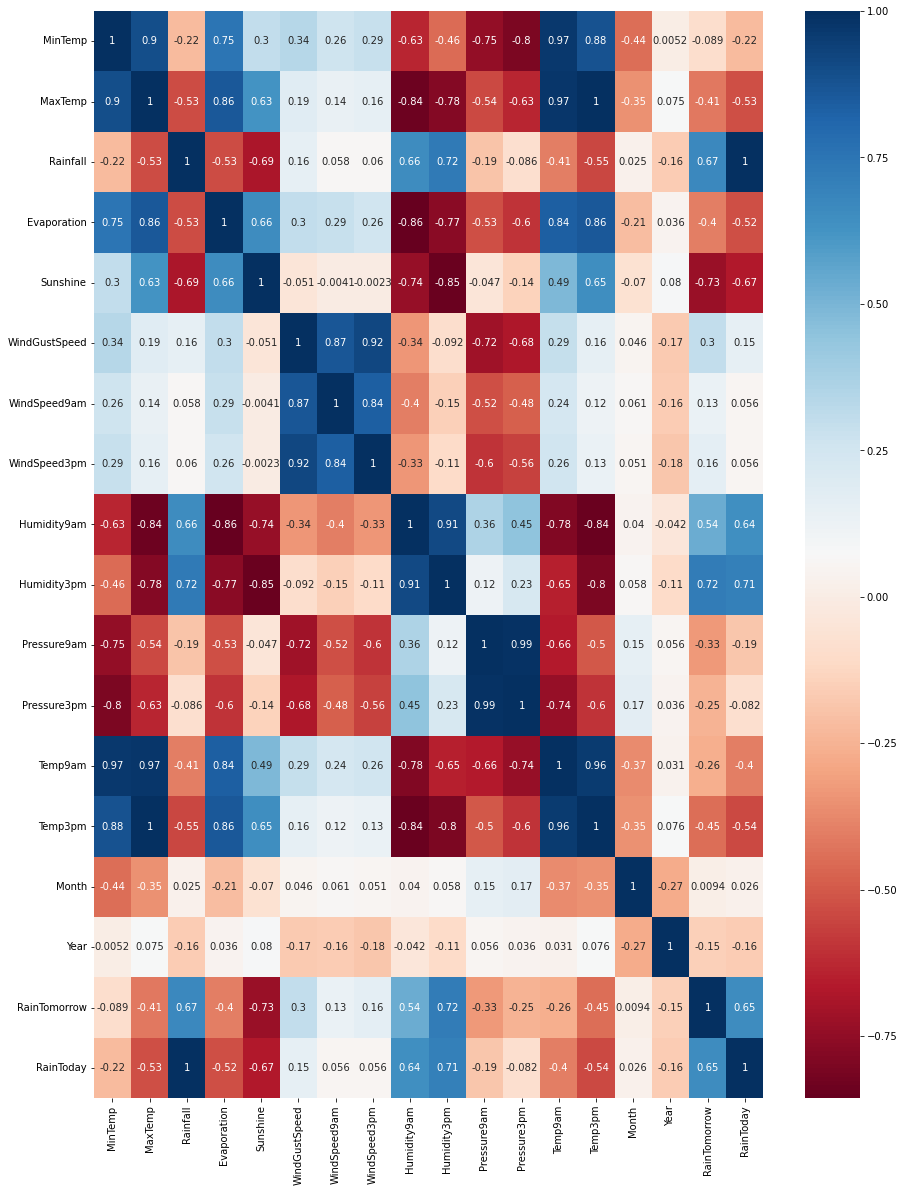

In [58]:
# Menampilkan korelasi kolom numerik
plt.figure(figsize=(15,20))
sns.heatmap(df_corr_num.corr(),cmap='RdBu' ,annot=True)

Berdasarkan visualisasi korelasi di atas terlihat bahwa kolom "MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm", "Year" berkolerasi rendah terhadap kolom rain today dan tomorrow.

### F.5. Menghapus Kolom yang Berelasi Rendah

In [59]:
# Menghapus kolom yang berelasi rendah
df_feature = data_col.drop(columns=['Location','WindGustDir','WindDir9am','WindDir3pm',
                                      'MinTemp', 'MaxTemp', 'Evaporation', 
                                        'Sunshine', 'Pressure9am',
                                        'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year'])
df_feature.columns

Index(['RainToday', 'RainTomorrow', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Month'],
      dtype='object')

In [60]:
df_feature

,RainToday,RainTomorrow,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Month
0,0,0,0.6,44.0,20.0,24.0,71.0,22.0,12
1,0,0,0.0,44.0,4.0,22.0,44.0,25.0,12
2,0,0,0.0,46.0,19.0,26.0,38.0,30.0,12
3,0,0,0.0,24.0,11.0,9.0,45.0,16.0,12
4,0,0,1.0,41.0,7.0,20.0,82.0,33.0,12
...,...,...,...,...,...,...,...,...,...
145455,0,0,0.0,31.0,13.0,11.0,51.0,24.0,6
145456,0,0,0.0,22.0,13.0,9.0,56.0,21.0,6
145457,0,0,0.0,37.0,9.0,9.0,53.0,24.0,6
145458,0,0,0.0,28.0,13.0,7.0,51.0,24.0,6


### F.6. Preprocessing Data

Membuat columnt transformer yang berisikan proces preprocessing pada data features itu sendiri, berikut merupakan proses preprocessingnya
- Numerical column : jika ada yang kosong akan diisi dengan median dan akan discaling dengan menggunakan metode robust
- Categorical column : akan dilakukan one-hot encoding karea kategorinya bertipe nominal bukan ordinal

Tentukan fitur (X) dan target (y). Lalu, kami akan menggunakan get_dummies() untuk mengonversi fitur kategorikal menjadi fitur dummy atau indikator.

In [61]:
# Split X dan y untuk set train dan test
X = pd.get_dummies(df_feature.drop("RainTomorrow",axis=1),drop_first=True)
y = df_feature["RainTomorrow"]

Membagi dataset menjadi 2 bagian yaitu training dan testing dengan rasio 75 : 25.

In [62]:
# Memisahkan y sebagai kolom yang akan diprediksi
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print(f"Training dataset\t: {len(X_train)} ({round(len(X_train) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)} ({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 109095 (75%)
Testing dataset		: 36365 (25%)


Karena semua fitur memiliki skala yang berbeda, kami akan membakukannya dengan StandardScaler().

In [63]:
# Membuat standarisasi dengan standarscaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

----
## G. Pendefinisian Model

__Model Benchmarking__

Dalam membuat model, maka perlu mencoba beberapa algoritma model, kemudian setiap model akan dilakukan corss validation dan dicari metrics `roc_auc` terbaik. Beberapa model yang dibuat, yaitu :
- Logistic Regression
- K-Nearest Neighbours
- Decision Tree
- Naive Bayes
- Random Forest
- Support Vector Macchine

Pada beberapa algortima memiliki parameter `class_weight` yang dapat diatur sehingga ketika algoritma melakukan training pada dataset imbalance hasil yang didapatkan tetap baik. Dalam hal ini, hanya akan dilakukan uji coba model dengan Logistic Regression dan SVM.

----
## H. Training Model

### H.1. Logistic Regression

In [64]:
# Membuat logistic regression
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model menggunakan training sets
log_reg_model.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_lr = log_reg_model.predict(X_test)

# Melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_lr)

print(classification_report(y_test,y_pred_lr))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28327
           1       0.72      0.44      0.54      8038

    accuracy                           0.84     36365
   macro avg       0.79      0.69      0.72     36365
weighted avg       0.83      0.84      0.82     36365

Accuracy: 0.8371786058022824


In [65]:
# Menggunakan Metode Prediksi Untuk Mendapatkan Model Pediksi Test Data
y_pred_test = log_reg_model.predict(X_test)

y_pred_test

array([1, 0, 0, ..., 0, 0, 0])

In [66]:
# Melihat perbandingan data train dan test
print('Training set score: {:.4f}'.format(log_reg_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(log_reg_model.score(X_test, y_test)))

Training set score: 0.8379
Test set score: 0.8372


#### F.1.1. Confusion Metrics Logistic Regression

Confusion matrix

 [[26932  1395]
 [ 4526  3512]]

True Positives (TP) =  26932

True Negatives (TN) =  3512

False Positives (FP) =  1395

False Negatives (FN) =  4526


<AxesSubplot:>

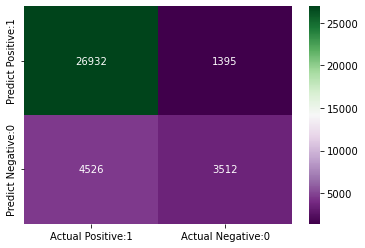

In [67]:
# Membuat confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Memisahkan confusion matrix menjadi 4 bagian
print('Confusion matrix\n\n', cm_lr)

print('\nTrue Positives (TP) = ', cm_lr[0,0])

print('\nTrue Negatives (TN) = ', cm_lr[1,1])

print('\nFalse Positives (FP) = ', cm_lr[0,1])

print('\nFalse Negatives (FN) = ', cm_lr[1,0])

TP_lr = cm_lr[0,0]
TN_lr = cm_lr[1,1]
FP_lr = cm_lr[0,1]
FN_lr = cm_lr[1,0]

# Membuat visualisasi confussion matrix dengan heatmap

cm_matrix_lr = pd.DataFrame(data=cm_lr, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_lr, annot=True, fmt='d', cmap='PRGn')

In [68]:
# Melihat precision score
precision_lr = TP_lr / float(TP_lr + FP_lr)

# Melihat recall
recall_lr = TP_lr / float(TP_lr + FN_lr)

# Melihat rate false positive
false_positive_rate_lr = FP_lr / float(FP_lr + TN_lr)

# Melihat specificity
specificity_lr = TN_lr / (TN_lr + FP_lr)

# Melihat classification accuracy lr
classification_accuracy_lr = (TP_lr + TN_lr) / float(TP_lr + TN_lr + FP_lr + FN_lr)

# Melihat classification error
classification_error_lr = (FP_lr + FN_lr) / float(TP_lr + TN_lr + FP_lr + FN_lr)


print('Precision : {0:0.4f}'.format(precision_lr))
print('Recall or Sensitivity : {0:0.4f}'.format(recall_lr))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate_lr))
print('Specificity : {0:0.4f}'.format(specificity_lr))
print('Classification Accuracy is : {0:0.4f}'.format(classification_accuracy_lr))
print('Classification Error is: {0:0.4f}'.format(classification_error_lr))


Precision : 0.9508
Recall or Sensitivity : 0.8561
False Positive Rate : 0.2843
Specificity : 0.7157
Classification Accuracy is : 0.8372
Classification Error is: 0.1628


#### F.1.2. Memvisualisasikan ROC Logistic Regression

In [69]:
# Melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan hujan
y_pred1_lr = log_reg_model.predict_proba(X_test)[:, 1]

In [70]:
# Memasukkan ROC AUC

roc_auc_lr = roc_auc_score(y_test, y_pred1_lr)

print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_lr))

ROC AUC Logistic Regression: 0.8336


<Figure size 432x288 with 0 Axes>

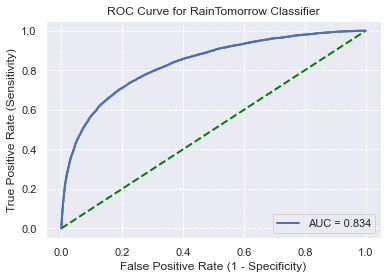

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1_lr, pos_label=1)

sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='green', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 14
plt.title('ROC Curve for RainTomorrow Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

__Kesimpulan:__

  Terlihat melalui ROC dan AUC bahwa sekitar __(False Positive Rate : 0.166)__ merupakan benar positif adalah baik. Semakin rendah nilai false positif rate, maka thresholdnya semakin bagus.

### F.2. SVM (Support Vector Machine)

In [72]:
# Membuat SVM model
svm_model = SVC(kernel='linear', C=1)

# Train SVM model
svm_model.fit(X_train, y_train)

# Prediksi menggunakan SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluasi accuracy
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     28327
           1       0.74      0.40      0.52      8038

    accuracy                           0.84     36365
   macro avg       0.79      0.68      0.71     36365
weighted avg       0.82      0.84      0.82     36365

Accuracy: 0.8358861542692149


In [73]:
# Melihat perbandingan data train dan test

print('Training set score: {:.4f}'.format(svm_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm_model.score(X_test, y_test)))

Training set score: 0.8364
Test set score: 0.8359


#### F.2.1. Confusion Metrics SVM

Confusion matrix

 [[27162  1165]
 [ 4803  3235]]

True Positives (TP) =  27162

True Negatives (TN) =  3235

False Positives (FP) =  1165

False Negatives (FN) =  4803


<AxesSubplot:>

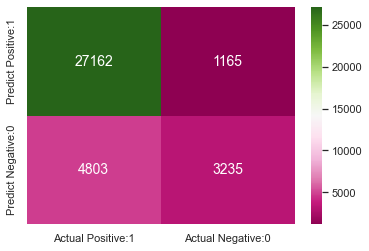

In [74]:
# Membuat confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Memisahkan confusion matrix menjadi 4 bagian
print('Confusion matrix\n\n', cm_svm)

print('\nTrue Positives (TP) = ', cm_svm[0,0])

print('\nTrue Negatives (TN) = ', cm_svm[1,1])

print('\nFalse Positives (FP) = ', cm_svm[0,1])

print('\nFalse Negatives (FN) = ', cm_svm[1,0])

TP_svm = cm_svm[0,0]
TN_svm = cm_svm[1,1]
FP_svm = cm_svm[0,1]
FN_svm = cm_svm[1,0]

# Membuat visualisasi confussion matrix dengan heatmap

cm_matrix_svm = pd.DataFrame(data=cm_svm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_svm, annot=True, fmt='d', cmap='PiYG')

In [75]:
# Melihat precision score
precision_svm = TP_svm / float(TP_svm + FP_svm)

# Melihat recall
recall_svm = TP_svm / float(TP_svm + FN_svm)

# Melihat rate false positive
false_positive_rate_svm = FP_svm / float(FP_svm + TN_svm)

# Melihat specificity
specificity_svm = TN_svm / (TN_svm + FP_svm)

# Melihat classification accuracy 
classification_accuracy_svm = (TP_svm + TN_svm) / float(TP_svm + TN_svm + FP_svm + FN_svm)

# Melihat classification error
classification_error_svm = (FP_svm + FN_svm) / float(TP_svm + TN_svm + FP_svm + FN_svm)


print('Precision : {0:0.4f}'.format(precision_svm))
print('Recall or Sensitivity : {0:0.4f}'.format(recall_svm))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate_svm))
print('Specificity : {0:0.4f}'.format(specificity_svm))
print('Classification Accuracy is : {0:0.4f}'.format(classification_accuracy_svm))
print('Classification Error is: {0:0.4f}'.format(classification_error_svm))

Precision : 0.9589
Recall or Sensitivity : 0.8497
False Positive Rate : 0.2648
Specificity : 0.7352
Classification Accuracy is : 0.8359
Classification Error is: 0.1641


#### F.2.2. Memvisualisasikan ROC SVM

In [76]:
model_roc_svm = SGDClassifier(loss='hinge', class_weight='balanced')
model_roc_svm.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.

y_train_pred_svm2 = model_roc_svm.decision_function(X_train)    
y_test_pred_svm2 = model_roc_svm.decision_function(X_test) 

In [77]:
# Memasukkan ROC AUC

ROC_AUC_SVM = roc_auc_score(y_test, y_test_pred_svm2)

print('ROC AUC SVM : {:.4f}'.format(ROC_AUC_SVM))

ROC AUC SVM : 0.8320


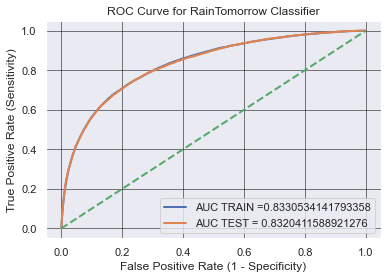

In [78]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_svm2)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_svm2)

plt.grid()

plt.plot(train_fpr, train_tpr, label="AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="AUC TEST = "+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve for RainTomorrow Classifier")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

__Kesimpulan:__

  Terlihat melalui ROC dan AUC bahwa sekitar (False Positive Rate : 0.168) merupakan benar positif adalah baik. Semakin rendah nilai false positif rate, maka thresholdnya semakin bagus.

----
## G. Evaluasi Model

### Logistic Regression

In [79]:
# Menemukan models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Menemukan grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Kesimpulan hasil
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.837836 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837832 (0.002262) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837832 (0.002262) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837832 (0.002262) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.837829 (0.002262) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837829 (0.002262) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837826 (0.002258) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.837820 (0.002262) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837817 (0.002265) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837817 (0.002265) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.837832 (0.002253) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837836 (0.002258) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837823 (0.002261) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.837826 (0.002371) with: {

In [80]:
# Membuat logistic regression
log_reg_model2 = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'newton-cg', max_iter=1000)

# Train the model menggunkan the training sets
log_reg_model2.fit(X_train, y_train)

# Prediksi the response untuk test dataset
y_pred_lr2 = log_reg_model2.predict(X_test)

# Melihat accuracy score
accuracy_score_log_new = accuracy_score(y_test, y_pred_lr2)

print(classification_report(y_test, y_pred_lr2))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28327
           1       0.72      0.44      0.54      8038

    accuracy                           0.84     36365
   macro avg       0.79      0.69      0.72     36365
weighted avg       0.82      0.84      0.82     36365

Accuracy: 0.8370136119895504


In [81]:
# Melihat perbandingan data train dan test

print('Training set score: {:.4f}'.format(log_reg_model2.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(log_reg_model2.score(X_test, y_test)))

Training set score: 0.8379
Test set score: 0.8370


### G.1. Confusion Metrics Logistic Regression

Confusion matrix

 [[26932  1395]
 [ 4532  3506]]

True Positives (TP) =  26932

True Negatives (TN) =  3506

False Positives (FP) =  1395

False Negatives (FN) =  4532


<AxesSubplot:>

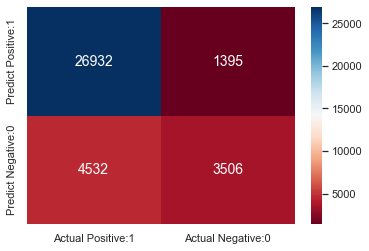

In [82]:
# Membuat confusion matrix
cm_lr2 = confusion_matrix(y_test, y_pred_lr2)

# Memisahkan confusion matrix menjadi 4 bagian
print('Confusion matrix\n\n', cm_lr2)

print('\nTrue Positives (TP) = ', cm_lr2[0,0])

print('\nTrue Negatives (TN) = ', cm_lr2[1,1])

print('\nFalse Positives (FP) = ', cm_lr2[0,1])

print('\nFalse Negatives (FN) = ', cm_lr2[1,0])

TP_lr = cm_lr2[0,0]
TN_lr = cm_lr2[1,1]
FP_lr = cm_lr2[0,1]
FN_lr = cm_lr2[1,0]

# Membuat visualisasi confussion matrix dengan heatmap

cm_matrix_lr2 = pd.DataFrame(data=cm_lr2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_lr2, annot=True, fmt='d', cmap='RdBu')

### G.2. Memvisualisasikan ROC Logistic Regression

In [83]:
# Melihat prediksi kemungkinan untuk kelas 1 (yes) untuk kemungkinan hujan

y_pred1_lr2 = log_reg_model2.predict_proba(X_test)[:, 1]

In [84]:
# Memasukkan ROC AUC

roc_auc_lr2 = roc_auc_score(y_test, y_pred1_lr2)

print('ROC AUC Logistic Regression: {:.4f}'.format(roc_auc_lr2))

ROC AUC Logistic Regression: 0.8336


<Figure size 432x288 with 0 Axes>

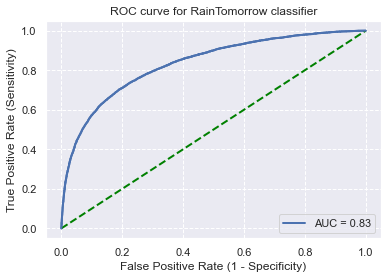

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1_lr2, pos_label=1)


sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1,  rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' , color='green', lw=2, linestyle='--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_lr2)
plt.legend(loc = 'lower right')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

----
## H. Model Inference

In [86]:
model_inference = {
    "RainToday":[0, 1, 0, 1],
    "Rainfall":[0.0, 0.5, 1.0, 1.5],
    "WindGustSpeed":[25.0, 35.0, 45.0, 55.0],
    "WindSpeed9am":[10.0, 25.0, 40.0, 65.0],
    "WindSpeed3pm":[50.0, 35.0, 20.0, 15.0],
    "Humidity9am":[15.0, 25.0, 35.0, 45.0],
    "Humidity3pm":[47.0, 36.0, 25.0, 18.0],
    "Month":[1, 2, 3, 4],
}

trial_data = pd.DataFrame(model_inference)
trial_data.head(5)

,RainToday,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Month
0,0,0.0,25.0,10.0,50.0,15.0,47.0,1
1,1,0.5,35.0,25.0,35.0,25.0,36.0,2
2,0,1.0,45.0,40.0,20.0,35.0,25.0,3
3,1,1.5,55.0,65.0,15.0,45.0,18.0,4


In [87]:
scaler = StandardScaler()
trial_data = scaler.fit_transform(trial_data)

In [88]:
pred_log_inf = log_reg_model2.predict(trial_data)
pred_svm_inf = svm_model.predict(trial_data)

print("Logistic Regression Model = ",pred_log_inf)
print("Support Virtual Machine Model = ",pred_svm_inf)

Logistic Regression Model =  [0 0 0 0]
Support Virtual Machine Model =  [0 0 0 0]


----
## I. Simpulan

__Hal-hal yang berpengaruh pada hasil uji korelasi RainTomorrow terhadap attribute yang penting dalam menentukan predisi hujan antara lain:__

1. Berdasarkan uji korelasi, RainToday memiliki nilai korelasi sebesar 0.65. Dapat diartikan, jika terjadi hujan pada hari ini (RainToday), maka kemungkinan terjadinya hujan esok hari (RainTomorrow) akan semakin besar .
2. Berdasarkan uji korelasi, Rainfall memiliki nilai korelasi sebesar 0.67. Dapat diartikan, jika semakin besar Jumlah Curah Hujan Tercatat dalam sehari sebelumnya (Rainfall), maka kemungkinan terjadinya hujan esok hari (RainTomorrow) akan semakin besar.
3. Berdasarkan uji korelasi, WindSpeed9am memiliki nilai korelasi sebesar 0.13 dan WindSpeed3pm memiliki nilai korelasi sebesar 0.16. Artinya, jika semakin besar kelembaban pada jam 9 pagi (WindSpeed9am) dan 3 Sore (WindSpeed3pm), maka kemungkinan terjadinya hujan esok hari (RainTomorrow) akan semakin besar.
4. Berdasarkan uji korelasi, Humidity9am memiliki nilai korelasi sebesar 0.54 dan Humidity3pm memiliki nilai korelasi sebesar 0.72. Artinya, jika semakin besar kelembaban pada jam 9 pagi (Humidity9am) dan 3 Sore (Humidity3pm), maka kemungkinan terjadinya hujan esok hari (RainTomorrow) akan semakin besar.

__Setelah dilakukan pemodelan dan evaluasi, didapatkan hasil :__
1. Logistic Regression
   - Training set score: 0.8379
   - Test set score: 0.8372
2. Support Vector Machine (SVM)
   - Training set score: 0.8364
   - Test set score: 0.8359

__Pada tahap pemodelan didapatkan akurasi skor:__
1. Logistic Regression sebesar 0.8396
2. Support Vector Machine (SVM) sebesar 0.8376

__Hasil yang didapatkan dari Model Inference__
Setelah membuat data sendiri dan diklasifikasi menggunalan model Logistic Regression dan Support Vector Machie (SVM), maka didapatkan hasil prediksi bernilai 0, 0 dan 0.